#  - K-Nearest Neighbor
Data file: social_network_ads.csv

### Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

In [39]:
import warnings
warnings.filterwarnings("ignore")

### Load data

In [40]:
# Read CSV into dataframe
df= pd.read_csv(r"social_network_ads(1).csv")

In [41]:
# Display first few rows
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

### Drop unnecessary columns 'User ID' and 'Gender'

In [43]:
df.drop(["User ID","Gender"], inplace=True, axis=1)

### Explore data

#### Display a histogram with bins showing the distribution of the variable: Age

### Apprich 1

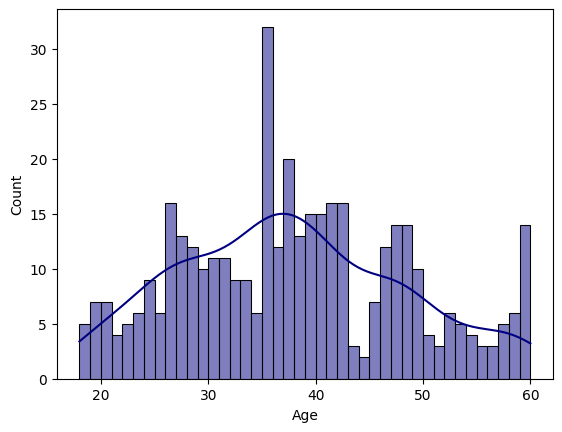

In [44]:
ax= sns.histplot(data=df, x="Age", kde=True,color = 'navy',bins = 42)

### Apprich 2

[Text(0, 0, '19'),
 Text(0, 0, '92'),
 Text(0, 0, '142'),
 Text(0, 0, '98'),
 Text(0, 0, '49')]

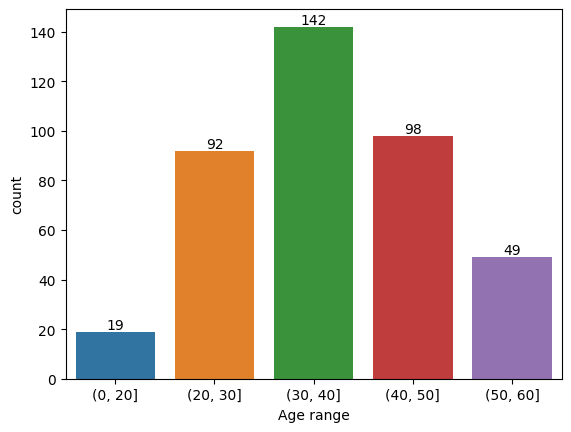

In [45]:
#print(df.Age.min(), df.Age.max())
df['Age_Bin'] = pd.cut(x=df['Age'], bins=[0, 20, 30, 40, 50, 60])

counts = df['Age_Bin'].value_counts().rename_axis('Age range').reset_index(name='count')
ax = sns.barplot(x='Age range', y='count', data=counts)
ax.bar_label(ax.containers[0])

#### Display a histogram with bins showing the distribution of the variable: EstimatedSalary

#### Apprich 1

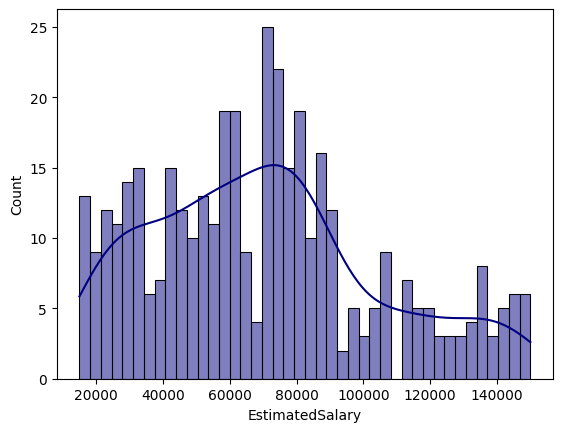

In [46]:
ax= sns.histplot(data=df, x="EstimatedSalary", kde=True,color = 'navy',bins = 42)

#### Apprich 2

[Text(0, 0, '38'),
 Text(0, 0, '86'),
 Text(0, 0, '119'),
 Text(0, 0, '84'),
 Text(0, 0, '37'),
 Text(0, 0, '36')]

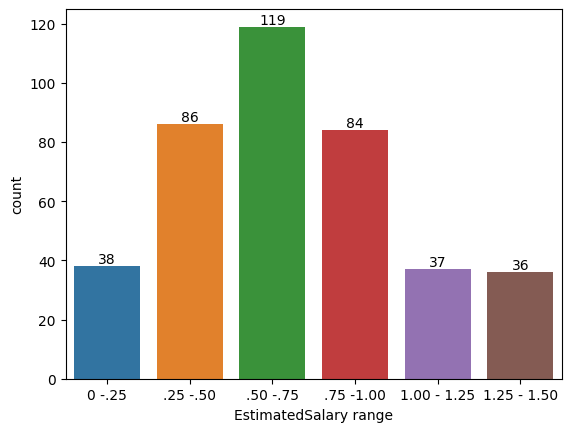

In [47]:
#print(df.EstimatedSalary.min(), df.EstimatedSalary.max())
labels = ['0 -.25','.25 -.50','.50 -.75','.75 -1.00','1.00 - 1.25','1.25 - 1.50']
df['ES_Bin'] = pd.cut(x=df['EstimatedSalary'], bins=[0, 25000, 50000, 75000, 100000, 125000, 150000], labels=labels)

counts = df['ES_Bin'].value_counts().rename_axis('EstimatedSalary range').reset_index(name='count')
ax = sns.barplot(x='EstimatedSalary range', y='count', data=counts)
ax.bar_label(ax.containers[0])

#### Display min and max for variable: Age

In [48]:
print(f"The Min and Max  of Age are min ({df.Age.min()}) max ({df.Age.max()})")

The Min and Max  of Age are min (18) max (60)


#### Display min and max for variable: EstimatedSalary

In [49]:
print(f"The Min and Max of EstimatedSalary are Min ({df.EstimatedSalary.min()}) Max ({df.EstimatedSalary.max()})")

The Min and Max of EstimatedSalary are Min (15000) Max (150000)


#### Note that the scale for variable EstimatedSalary is much higher than for variable Age

In [50]:
df2= df.iloc[:,:3]

In [51]:
df2.shape

(400, 3)

### Separate independent and dependent variables
* Independent variables: All except Purchased
* Dependent variable: Purchased

In [52]:
df2.head(3) #400 3

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [53]:
y= df2.iloc[:,-1:] #400 1 
x= df2.iloc[:,:-1] #400 2

### Scale (standardize) variables: Age and EstimatedSalary

In [54]:
# Use StandardScaler
from sklearn.preprocessing import StandardScaler

In [55]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [56]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [57]:
x_scaled[:,0] # Array

array([-1.78179743, -0.25358736, -1.11320552, -1.01769239, -1.78179743,
       -1.01769239, -1.01769239, -0.54012675, -1.20871865, -0.25358736,
       -1.11320552, -1.11320552, -1.6862843 , -0.54012675, -1.87731056,
       -0.82666613,  0.89257019,  0.70154394,  0.79705706,  0.98808332,
        0.70154394,  0.89257019,  0.98808332,  0.70154394,  0.79705706,
        0.89257019,  1.08359645,  0.89257019, -0.82666613, -0.63563988,
       -0.63563988, -1.01769239, -1.59077117, -0.92217926, -1.01769239,
       -0.25358736, -0.44461362, -0.73115301, -1.11320552, -1.01769239,
       -1.01769239, -0.44461362, -0.25358736, -0.73115301, -0.92217926,
       -1.39974491, -1.20871865, -1.01769239, -0.73115301, -0.63563988,
       -1.30423178, -1.87731056, -0.82666613, -0.25358736, -1.01769239,
       -1.30423178, -1.39974491, -0.92217926, -1.49525804, -0.54012675,
       -1.01769239, -1.20871865, -1.39974491, -0.54012675,  2.03872775,
       -1.30423178, -1.30423178, -1.39974491, -1.49525804, -0.63

In [58]:
x["Age"]=pd.Series(x_scaled[:,0])
x["EstimatedSalary"]=pd.DataFrame(x_scaled[:,1])

In [59]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


#### Display min and max for scaled variable: Age

In [60]:
print(f"The Min nad Max of Scaled Age are:- ( {x.Age.min()} and {x.Age.max()} ) ")

The Min nad Max of Scaled Age are:- ( -1.8773105578331641 and 2.134240875847471 ) 


#### Display min and max for scaled variable: EstimatedSalary

In [61]:
print(f"The Min nad Max of Scaled EstimatedSalary are:- ( {x.EstimatedSalary.min()} and {x.EstimatedSalary.max()} ) ")

The Min nad Max of Scaled EstimatedSalary are:- ( -1.6075056615492507 and 2.3567499772898386 ) 


### Split data into training and test sets

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Train KNeighborsClassifier (with default hyperparameters)

In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluate model performance

In [64]:
# Predict using the test set
y_pred=knn.predict(X_test)

In [65]:
# Print model accuracy score on test set
from sklearn.metrics import accuracy_score
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 93.33%


In [66]:
# Generate classification report to evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



In [67]:
possible_k = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]

In [68]:
# Calculate accuracy for each k value
ac_scores=[]
for k in possible_k:
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', metric='cosine')
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores=accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
print ("Accuracy Scores :", ac_scores)

Accuracy Scores : [0.825, 0.825, 0.825, 0.825, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


In [69]:
# Calculate the error
error = [1-x for x in ac_scores]
print ("Error :", error)

Error : [0.17500000000000004, 0.17500000000000004, 0.17500000000000004, 0.17500000000000004, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663]


In [70]:
i = error.index(min(error))
best_k = possible_k[i]
print ("Best value of k is", best_k)

Best value of k is 11


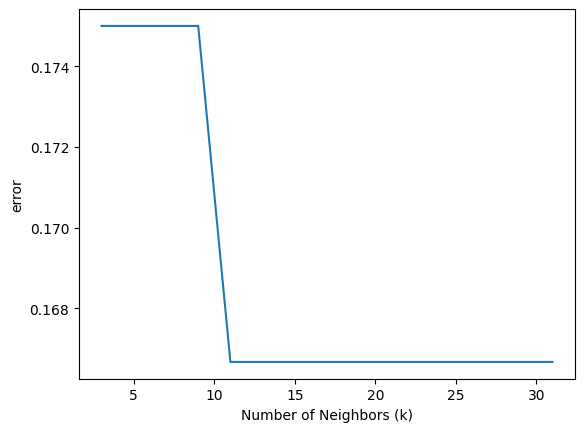

In [71]:
plt.plot(possible_k, error)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("error")
plt.show()

### Train KNeighborsClassifier (change n_neighbors hyperparameter and at least one other hyperparameter)

In [72]:
# ( metric='euclidean' ), ( metric='manhattan' ), ( metric='chebyshev' ), 
# (metric='minkowski', p=3), ( metric='hamming' )


knn=KNeighborsClassifier(n_neighbors=13, weights='distance', metric='cosine')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=13, weights='distance')

### Evaluate model performance

In [73]:
# Predict using the test set
y_pred=knn.predict(X_test)

In [74]:
# Print model accuracy score on test set
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 83.33%


In [75]:
# Generate classification report to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        73
           1       0.81      0.74      0.78        47

    accuracy                           0.83       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.83      0.83       120

